# 1. Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
geo_data_0 = pd.read_csv('datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('datasets/geo_data_2.csv')

In [3]:
def check_geo_data(geo_data, title):
    print(title)
    print()
    print(geo_data.info())
    print('\nКол-во дубликатов:', geo_data.duplicated().sum())
    geo_data.hist(figsize=(10,5), bins=18)
    plt.show()

Регион №1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Кол-во дубликатов: 0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matpl

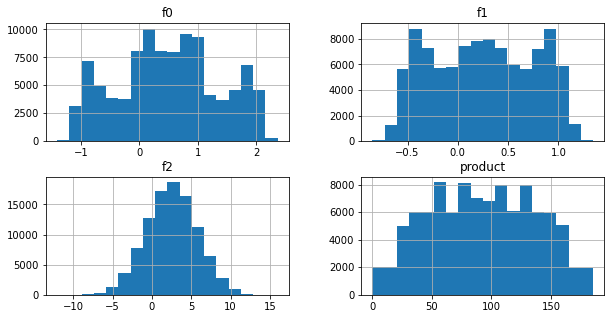

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
check_geo_data(geo_data_0, 'Регион №1')
geo_data_0.head()

Регион №2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Кол-во дубликатов: 0


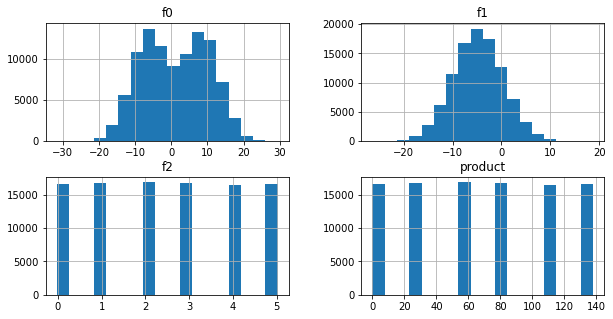

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
check_geo_data(geo_data_1, 'Регион №2')
geo_data_1.head()

Регион №3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Кол-во дубликатов: 0


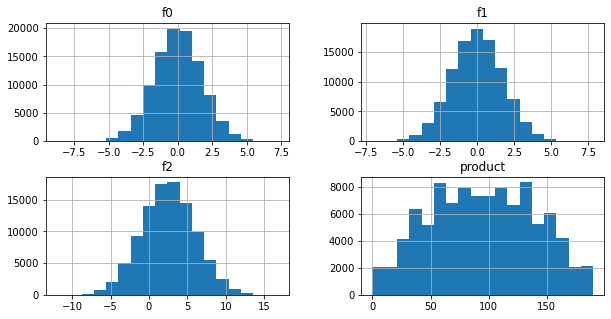

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [6]:
check_geo_data(geo_data_2, 'Регион №3')
geo_data_2.head()

Данные по каждому региону полные, без пропусков и дубликатов.  
Регион №2 отличается от остальных. Распределение значений в столбцах "f2" и "product" в регионах №1 и №3 напоминает нормальное, а в регионе №2 - сгруппированы вокруг 6 значений, причем разделены между этими 6 значений примерно поровну. Эти данные не выглядят достоверными, использовать их нужно с осторожностью. Неплохо было бы обратиться к источнику данных за разъяснениями.

Чтобы составить предварительное впечатление о различиях между тремя регионами, посмотрим на распределение запасов по регионам на графике с усами и на единой гистограмме.

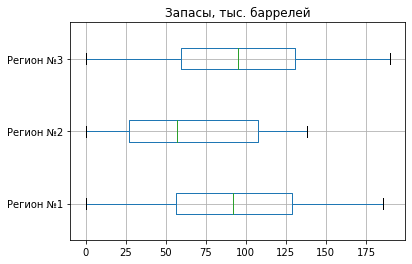

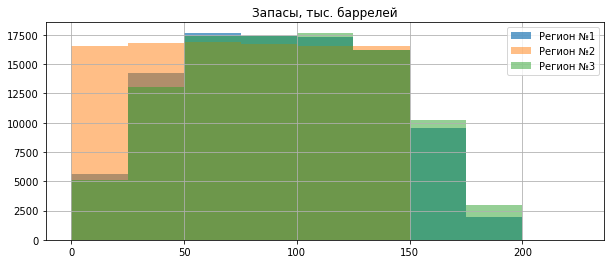

Средние запасы по регионам, тыс. баррелей:
Регион №1    92.5
Регион №2    68.8
Регион №3    95.0
dtype: float64


In [7]:
products = pd.DataFrame({'Регион №1': geo_data_0['product'], 'Регион №2': geo_data_1['product'], 'Регион №3': geo_data_2['product']})

products.boxplot(vert=False)
plt.title('Запасы, тыс. баррелей')
plt.show()

bins = range(0,250,25)
products['Регион №1'].hist(bins=bins, alpha=0.7, label='Регион №1', figsize=(10,4))
products['Регион №2'].hist(bins=bins, alpha=0.5, label='Регион №2')
products['Регион №3'].hist(bins=bins, alpha=0.5, label='Регион №3')
plt.title('Запасы, тыс. баррелей')
plt.legend()
plt.show()

print('Средние запасы по регионам, тыс. баррелей:')
print(products.mean().round(1))

Средние запасы в месторождениях регионов №1 и №3 практически одинаковые - 92,5 и 95 тыс. баррелей соовтетственно. Средние запасы в месторождения региона №2 ниже - всего 68,8 тыс. баррелей. 

# 2. Обучение и проверка модели

Подготовим данные по каждому региону.

In [8]:
def prepare_data(geo_data):
    
    # разделим данные на признаки и целевые признаки
    features = geo_data[['f0','f1','f2']]
    target = geo_data['product']
    
    # разобьем данные на обучающую и валидационную выборки в соотношении 75:25
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=123)
    
    # стандартизируем признаки
    columns = features_train.columns
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = pd.DataFrame(scaler.transform(features_train), columns=columns)
    features_valid = pd.DataFrame(scaler.transform(features_valid), columns=columns)
    
    return(features_train, features_valid, target_train, target_valid)

In [9]:
features_train0, features_valid0, target_train0, target_valid0 = prepare_data(geo_data_0)
features_train1, features_valid1, target_train1, target_valid1 = prepare_data(geo_data_1)
features_train2, features_valid2, target_train2, target_valid2 = prepare_data(geo_data_2)

Обучим модель по каждому региону в отдельности

In [10]:
result_table = pd.DataFrame()

def check_model(model, features_valid, target_valid, area):
    predicted_valid = model.predict(features_valid)
    predicted_valid = pd.Series(predicted_valid, index=target_valid.index)
    
    r2 = r2_score(target_valid, predicted_valid)
    rmse = mean_squared_error(target_valid, predicted_valid) ** 0.5
    
    result_table.loc['реальное среднее, тыс. баррелей',area] = np.round(target_valid.mean(),1)
    result_table.loc['предсказанное среднее, тыс. баррелей',area] = np.round(predicted_valid.mean(),1)
    result_table.loc['RMSE, тыс. баррелей',area] = np.round(rmse,1)
    result_table.loc['R2',area] = np.round(r2,2)
    
    return(predicted_valid)

In [11]:
model0 = LinearRegression().fit(features_train0, target_train0)
model1 = LinearRegression().fit(features_train1, target_train1)
model2 = LinearRegression().fit(features_train2, target_train2)

predicted0 = check_model(model0, features_valid0, target_valid0, 'Регион №1')
predicted1 = check_model(model1, features_valid1, target_valid1, 'Регион №2')
predicted2 = check_model(model2, features_valid2, target_valid2, 'Регион №3')
result_table

,Регион №1,Регион №2,Регион №3
"реальное среднее, тыс. баррелей",92.90,69.3,94.90
"предсказанное среднее, тыс. баррелей",92.50,69.3,95.10
"RMSE, тыс. баррелей",37.60,0.9,40.10
R2,0.28,1.0,0.19


Все модели работают, метрика R2 больше нуля. Среднее значение предсказаний близко к среднему значению для выборки. С другой стороны, моделям для регионов №1 и №3 до идеала далеко: они показали ошибку 37,6 и 40,1 тыс. баррелей, что не так уж и мало в сравнении со средним значением (92,5 и 95,1 тыс. баррелей). Модель для региона №2 показала отличный результат: метрика R2 приближается к единице, а средняя ошибка составляет всего 0,9 тыс. баррелей. Это связано с особенностями распределения признаков в этом регионе: модели легко различить данные, относящиеся к разным пикам, отсюда и маленькая ошибка. Есть подозрение, что в реальности, если во входных данных параметра f2 появятся промежуточные значения между шестью пиками, которых не было в обучающей выборке, модель может показать совсем другой результат.  
Сравним распределение прогнозных и реальных запасов в каждом из регионов

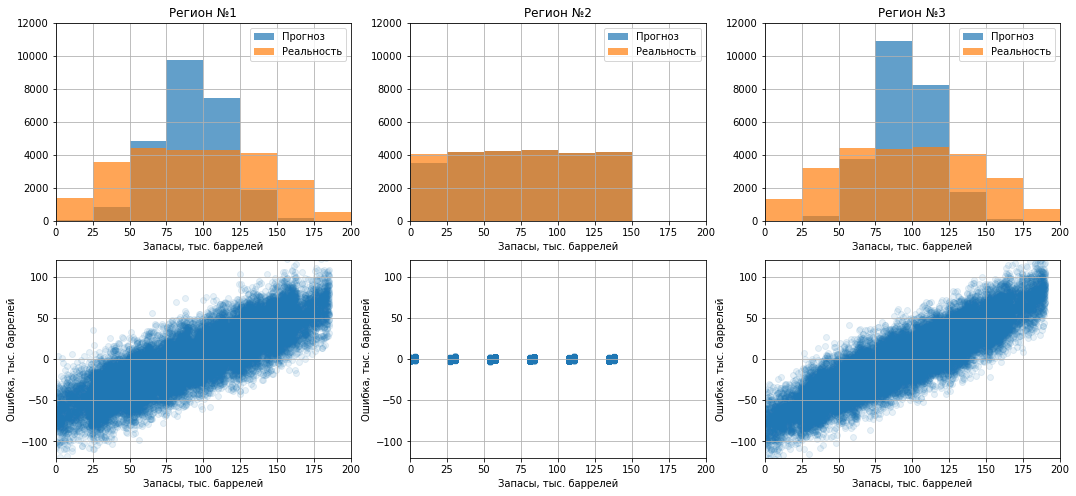

In [12]:
def plot_products(ax, predicted, real, title):
    bins = range(0,220,25)
    ax.hist(predicted, bins=bins, alpha=0.7, label='Прогноз')
    ax.hist(real, bins=bins, alpha=0.7, label='Реальность')
    ax.set_title(title)
    ax.set_xlabel('Запасы, тыс. баррелей')
    ax.set_ylim(0,12000)
    ax.set_xlim(0,200)
    ax.legend()
    ax.grid()
    
def plot_error(ax, predicted, real):
    error = real - predicted
    ax.scatter(real, error, alpha=0.1)
    ax.set_xlabel('Запасы, тыс. баррелей')
    ax.set_ylabel('Ошибка, тыс. баррелей')
    ax.set_ylim(-120,120)
    ax.set_xlim(0,200)
    ax.grid()

fig, ax = plt.subplots(2, 3, figsize=(18, 8))
plot_products(ax[0,0], predicted0, target_valid0, 'Регион №1')
plot_products(ax[0,1], predicted1, target_valid1, 'Регион №2')
plot_products(ax[0,2], predicted2, target_valid2, 'Регион №3')
plot_error(ax[1,0], predicted0, target_valid0)
plot_error(ax[1,1], predicted1, target_valid1)
plot_error(ax[1,2], predicted2, target_valid2)
plt.show()

Модели для регионов №1 и №3 тяготеют к предсказанию средних значений, чем сильнее отличается реальный запас в месторождении от среднего значения по региону, тем сильнее ошибается модель. Зависимость этой ошибки практически линейная.

Теперь проверим адекватность моделей, сравнив их ошибки с ошибками для средних значений.

In [13]:
def check_adequate(target_train, target_valid, area):
    predicted_mean = pd.Series(target_train.mean(), index=target_valid.index)
    rmse_mean = mean_squared_error(target_valid, predicted_mean) ** 0.5
    print('{:s}: RMSE для среднего = {:.1f} тыс. баррелей:'.format(area, rmse_mean))

check_adequate(target_train0, target_valid0, 'Регион №1')
check_adequate(target_train1, target_valid1, 'Регион №2')
check_adequate(target_train2, target_valid2, 'Регион №3')

Регион №1: RMSE для среднего = 44.4 тыс. баррелей:
Регион №2: RMSE для среднего = 45.8 тыс. баррелей:
Регион №3: RMSE для среднего = 44.7 тыс. баррелей:


Ошибка моделей ниже, чем для среднего значения, что подтверждает их адеватность.

В качестве эксперимента попробуем обучить модель по объединенным данным и посмотрим, как она себя покажет в каждом регионе. Это может пригодиться, если мы пойдем в совершенно новый регион, по которому еще нет обучающих данных. 

In [14]:
features_train_joined = pd.concat([features_train0, features_train1, features_train2], ignore_index=True)
target_train_joined = pd.concat([target_train0, target_train1, target_train2], ignore_index=True)
features_valid_joined = pd.concat([features_valid0, features_valid1, features_valid2], ignore_index=True)
target_valid_joined = pd.concat([target_valid0, target_valid1, target_valid2], ignore_index=True)

model_joined = LinearRegression().fit(features_train_joined, target_train_joined)
check_model(model_joined, features_valid0, target_valid0, 'Регион №1')
check_model(model_joined, features_valid1, target_valid1, 'Регион №2')
check_model(model_joined, features_valid2, target_valid2, 'Регион №3')
result_table

,Регион №1,Регион №2,Регион №3
"реальное среднее, тыс. баррелей",92.90,69.30,94.9
"предсказанное среднее, тыс. баррелей",85.50,85.80,85.4
"RMSE, тыс. баррелей",39.50,23.80,42.4
R2,0.21,0.73,0.1


Ошибки модели, обученной по объединенным данным, в регионах №1 и №3 еще немного несколько возросли, что для данных регионов недопустимо, там ошибка и так велика. В регионе №2 ошибка тоже возросла, причем заметно, с 0,9 до 23,8 тыс. баррелей, хотя этот результат все равно лучше, чем тот, который был получен у моделей, специально обученных для работы в регионах №1 и №3. Увеличение ошибок произошло за счет того, что модель по-прежнему тяготеет к предсказанию средних значений, но теперь считает среднее по всем трем регионам.  
Похоже, такую модель можно применять только в крайнем случае и для грубого анализа. Если в новом регионе средний запас месторождений будет сильно отличаться от этих трех регионов, рискуем получить большую ошибку.

# 3. Подготовка к расчёту прибыли

Сохраним в коде все ключевые значения для расчётов

In [15]:
# кол-во выборок Bootstrap
bootstrap_length = 1000
# количество исследований в каждом регионе
probes_amount = 500

# бюджет на разработку месторождений (млн. руб.)
total_budget = 10e3
# стоимость бурения одной скважины (млн. руб.)
boring_price = 50
# прибыль с 1 тыс. баррелей сырья (млн. руб.)
barrel_income = 4.5

# доверительный интервал
confidence_interval = 0.95
# верхний и нижний квантили для доверительного интервала
quantile1 = round((1-confidence_interval)/2, 3)
quantile2 = 1-quantile1

# порог риска убытков
loss_risk = 0.025

Посчитаем минимальный средний объём сырья в месторождениях региона, достаточный для его разработки.

In [16]:
oilwell_amount = int(total_budget / boring_price)
print('Кол-во скважин:', oilwell_amount)
product_treshold = total_budget / oilwell_amount / barrel_income
print('Требуемый средний объем сырья (тыс. баррелей):', np.round(product_treshold,1))

Кол-во скважин: 200
Требуемый средний объем сырья (тыс. баррелей): 11.1


Выделенный бюджет позволит пробурить 200 скважин из 500 исследованных. Для того, чтобы прибыль превысила затраты, средний объем сырья в месторождениях региона должен быть не менее 11,1 тыс. баррелей. Этому критерию удовлетворяют все три региона, важно лишь не сильно ошибаться в прогнозе запасов.

Введем функцию для расчёта прибыли по набору отобранных месторождений и предсказаний модели

In [17]:
def calc_income(product):
    income = [i*barrel_income - boring_price for i in product]
    return(sum(income))

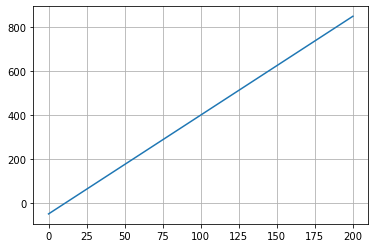

In [18]:
test_product = range(0,210,10)
test_income = []
for t in test_product:
    test_income.append(calc_income([t]))
plt.plot(test_product, test_income)
plt.grid()
plt.show()

# 4. Расчёт прибыли и рисков 

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли

Техникой Bootstrap сформируем 1000 выборок из 500 случайных месторождений (имитирует исследование 500 новых скважин). В каждой выборке выбирается 200 скважин с наибольшим прогнозным запасом и для них вычисляется суммарная прогнозная прибыль.

In [19]:
def bootstrap (predicted_product, real_product):

    state = np.random.RandomState(12345)
    real_income = []
    
    for i in range(bootstrap_length):
        # формируем выборку из 500 случайных скважин из валидационной выборки
        resampled = predicted_product.sample(n=probes_amount, replace=True, random_state=state)
        # выбираем 200 скважин с наибольшими предсказанными запасами 
        selected = resampled.sort_values(ascending=False)[:oilwell_amount]
        # считаем суммарную реальную прибыль для выбранных скважин 
        real_income.append(calc_income(real_product[selected.index]))

    real_income = pd.Series(real_income)
    return real_income

In [20]:
predicted_income0 = bootstrap(predicted0, target_valid0)
predicted_income1 = bootstrap(predicted1, target_valid1)
predicted_income2 = bootstrap(predicted2, target_valid2)

Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков

In [21]:
def check_income(predicted_income, title):
    print('\n{:s}: {:.1f} млн. руб.'.format(title, predicted_income.mean()))
    lower = predicted_income.quantile(quantile1)
    upper = predicted_income.quantile(quantile2)
    confidence_interval
    
    print('95% доверительный интервал от {:.1f} до {:.1f} млн. руб.'.format(lower, upper))

In [22]:
print('Средняя прогнозная прибыль:')
check_income(predicted_income0, 'Регион №1')
check_income(predicted_income1, 'Регион №2')
check_income(predicted_income2, 'Регион №3')

Средняя прогнозная прибыль:

Регион №1: 94763.0 млн. руб.
95% доверительный интервал от 90048.0 до 100084.2 млн. руб.

Регион №2: 94802.1 млн. руб.
95% доверительный интервал от 90830.3 до 98900.3 млн. руб.

Регион №3: 93531.6 млн. руб.
95% доверительный интервал от 88219.3 до 98970.9 млн. руб.


Расчеты показали, что риск убытков значительно ниже установленного порога 0,025. В каждом регионе с вероятностью 0,975 прогнозируется прибыль не менее 90 млрд. руб.  
Наибольшая средняя прибыль прогнозируется в регионе №2 - 94,8 млрд. руб., но при этом доверительный интервал этой оценки шире, чем в других регионах. Это означает, что существует вероятность получить прибыль ниже, чем в других регионах, хотя эта вероятность и невелика. Более наглядно это можно изобразить на графике с усами.

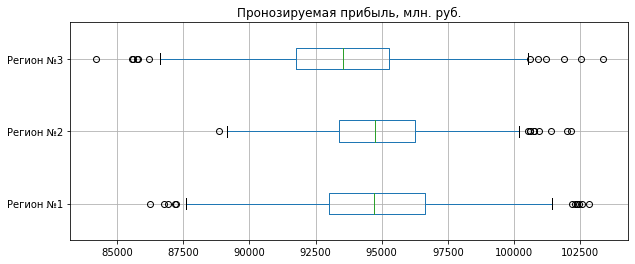

In [23]:
income = pd.DataFrame({'Регион №1': predicted_income0, 'Регион №2': predicted_income1, 'Регион №3': predicted_income2})
income.head()
income.boxplot(vert=False, figsize=(10,4))
plt.title('Пронозируемая прибыль, млн. руб.')
plt.show()

Каков риск получить убытки? Проверим минимальные значения предсказанной прибыли.

In [24]:
print('Минимальная прибыль для региона №1 (млн. руб.):', np.round(predicted_income0.min(),1))
print('Минимальная прибыль для региона №2 (млн. руб.):', np.round(predicted_income1.min(),1))
print('Минимальная прибыль для региона №3 (млн. руб.):', np.round(predicted_income2.min(),1))

Минимальная прибыль для региона №1 (млн. руб.): 86265.1
Минимальная прибыль для региона №2 (млн. руб.): 88841.1
Минимальная прибыль для региона №3 (млн. руб.): 84199.9


Ни в одной из 1000 выборок для каждого региона не были спрогнозированы убытки. Это не значит, что риск убытков совсем отсутствует. Всегда есть вероятность, что все 500 новых скважин окажутся с запасами менее 11 тыс. баррелей, такие месторождения есть во всех регионах (кстати, при этом модель завысит их запасы), но вероятность этого события очень мала, что и подтверждено результатами применения техники Bootstrap.

Для оценки влияния качества получившейся модели на прибыль, дополнительно посчитаем прибыль, которую можно было бы получить при идеальной модели с нулевой ошибкой. В этом случае будем производить выбор 200 скважин с учетом знания реальных, а не прогнозных запасов.

In [26]:
max_income0 = bootstrap(target_valid0, target_valid0)
max_income1 = bootstrap(target_valid1, target_valid1)
max_income2 = bootstrap(target_valid2, target_valid2)

Средняя прибыль при идеальной модели:

Регион №1: 114377.7 млн. руб.
95% доверительный интервал от 110295.7 до 118222.0 млн. руб.

Регион №2: 94813.8 млн. руб.
95% доверительный интервал от 90837.3 до 98900.3 млн. руб.

Регион №3: 116185.9 млн. руб.
95% доверительный интервал от 112014.8 до 120265.1 млн. руб.


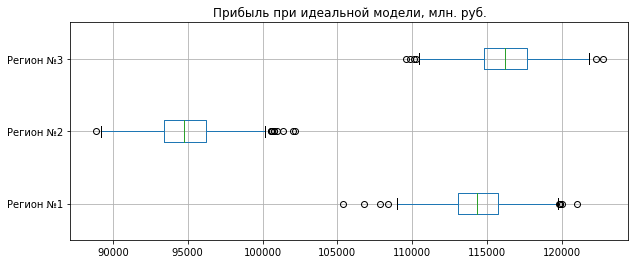

In [27]:
print('Средняя прибыль при идеальной модели:')
check_income(max_income0, 'Регион №1')
check_income(max_income1, 'Регион №2')
check_income(max_income2, 'Регион №3')

income = pd.DataFrame({'Регион №1': max_income0, 'Регион №2': max_income1, 'Регион №3': max_income2})
income.head()
income.boxplot(vert=False, figsize=(10,4))
plt.title('Прибыль при идеальной модели, млн. руб.')
plt.show()

При использовании идеальной модели графики с усами ожидаемо напоминают графики для распределения запасов.
Из модели для региона №2 выжали практически все, что можно, прибыль тут практически не изменилась - те же 95 млрд. руб.
А вот в регионах №1 и №3 средняя прибыль при идеальной модели повысилась бы с 93 до примерно 115 млрд. руб. 
Вывод: чтобы получить больше прибыли, нужно сосредоточиться на улучшении моделей для регионов №1 и №3.

## Выводы


Потенциальная прибыль по каждому из трех регионов была оценена с использованием техники Bootstrap на 1000 выборок.

Все три региона обеспечивают прибыль, риск убытков значительно ниже порога 2,5%.  
Предлагается вести разработку месторождений в регионе №1 (данные из файла geo_data_0.csv). Построенные по имеющимся данным модели прогнозируют примерно одинаковую среднюю прибыль в регионах №1 и №2 (94,8 млрд. руб.), но для региона №2 это предел, а в регионе №1 дальшейшее улучшение модели позволит значительно повысить прибыль.

В дальнейшем рекомендуется следующее:
- проверить данные по региону №2 (распределение признака f2 и запасов сильно отличается от других регионов и выглядит неправдоподобно);
- повысить точность предсказаний моделей для регионов №1 и №3, что позволит расчитывать на более высокую прибыль.